In [174]:
import pandas as pd
import numpy as np

Loading merge.csv file to dataframe df

In [175]:
df= pd.read_csv('merge.csv');
print(df.head())

      customer_code     transaction_time   item code  sales_quantity  \
0  customer_code_78  2023-01-03 13:49:00  item_cd_12              13   
1  customer_code_78  2023-01-12 08:08:00   item_cd_6              14   
2  customer_code_78  2023-01-17 12:15:00   item_cd_2              14   
3  customer_code_78  2023-01-25 16:37:00  item_cd_16              11   
4  customer_code_78  2023-02-03 15:11:00   item_cd_3              14   

  department item_category    item_name  
0      fresh        fruits  green apple  
1      fresh    vegetables     beetroot  
2      fresh    vegetables     potatoes  
3      fresh        fruits        mango  
4      fresh    vegetables      pumpkin  


In [176]:
# prompt: find how many rows in df

num_rows = len(df)
print(f"Number of rows: {num_rows}")


Number of rows: 654881


In [177]:
# prompt: find how many rows has customer_code_78 in customer_code column

customer_code_78_count = df['customer_code'].value_counts()['customer_code_78']
print(f"Number of rows with customer_code_78: {customer_code_78_count}")


Number of rows with customer_code_78: 180


In [178]:
df

customer_code     transaction_time   item code  sales_quantity  \
0         customer_code_78  2023-01-03 13:49:00  item_cd_12              13   
1         customer_code_78  2023-01-12 08:08:00   item_cd_6              14   
2         customer_code_78  2023-01-17 12:15:00   item_cd_2              14   
3         customer_code_78  2023-01-25 16:37:00  item_cd_16              11   
4         customer_code_78  2023-02-03 15:11:00   item_cd_3              14   
...                    ...                  ...         ...             ...   
654876   customer_code_548  2023-05-30 12:42:00  item_cd_44               1   
654877  customer_code_3672  2023-05-30 12:42:00  item_cd_44               1   
654878  customer_code_2028  2023-05-30 12:42:00  item_cd_44               1   
654879  customer_code_1163  2023-05-30 12:42:00  item_cd_44               1   
654880  customer_code_3057  2023-05-30 12:42:00  item_cd_44               1   

       department  item_category               item_name  
0           fresh         fruits             green apple  
1           fresh     vegetables                beetroot  
2           fresh     vegetables                potatoes  
3           fresh         fruits                   mango  
4           fresh     vegetables                 pumpkin  
...           ...            ...                     ...  
654876  lifestyle  wellness_food  green_tea_bags_25_pack  
654877  lifestyle  wellness_food  green_tea_bags_25_pack  
654878  lifestyle  wellness_food  green_tea_bags_25_pack  
654879  lifestyle  wellness_food  green_tea_bags_25_pack  
654880  lifestyle  wellness_food  green_tea_bags_25_pack  

[654881 rows x 7 columns]

In [179]:
# # Convert 'sales_quantity' to numeric (in case it's not already)
# df['sales_quantity'] = pd.to_numeric(df['sales_quantity'], errors='coerce')

# # Group by department and item_name, summing up the sales_quantity
# department_totals = df.groupby(['department', 'item_name'])['sales_quantity'].sum().reset_index()

# # Sort each department's item_names by total sales_quantity
# sorted_item_names = department_totals.sort_values(by=['department', 'sales_quantity'], ascending=[True, False])

# # Display the sorted item_names by department
# sorted_item_names.head()

In [180]:
# prompt: output sorted_item_names dataset into a csv

# sorted_item_names.to_csv('sorted_item_names.csv')


Renaming customer_codes (new customer code consists only a number)

In [181]:
# prompt: in customer_code column cells i want to remove customer_code_ so that only the numbers are there in the column

df['customer_code'] = df['customer_code'].str.replace('customer_code_', '')


removing transactions happened beyond last six months

In [182]:
start_date = '2023-01-08'
end_date = '2023-07-08'

df = df[(df['transaction_time'] >= start_date) & (df['transaction_time'] <= end_date)]

In [183]:
name_df = df.copy();

In [184]:
department_df = df.copy()

# clustering based on item_categories

In [185]:
# prompt: i want to get the unique item_category as columns and enter the sales_quantity values in each column added to the same df.

import numpy as np
unique_categories = df['item_category'].unique()
for category in unique_categories:
  df[category] = np.where(df['item_category'] == category, df['sales_quantity'], 0)
df.head()

<ipython-input-185-dcfe24a79fe5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[category] = np.where(df['item_category'] == category, df['sales_quantity'], 0)
<ipython-input-185-dcfe24a79fe5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[category] = np.where(df['item_category'] == category, df['sales_quantity'], 0)
<ipython-input-185-dcfe24a79fe5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


customer_code     transaction_time   item code  sales_quantity department  \
1            78  2023-01-12 08:08:00   item_cd_6              14      fresh   
2            78  2023-01-17 12:15:00   item_cd_2              14      fresh   
3            78  2023-01-25 16:37:00  item_cd_16              11      fresh   
4            78  2023-02-03 15:11:00   item_cd_3              14      fresh   
5            78  2023-02-08 12:56:00   item_cd_1              10      fresh   

  item_category item_name  vegetables  fruits  dairy  seafood  frozen_meat  \
1    vegetables  beetroot          14       0      0        0            0   
2    vegetables  potatoes          14       0      0        0            0   
3        fruits     mango           0      11      0        0            0   
4    vegetables   pumpkin          14       0      0        0            0   
5    vegetables    carrot          10       0      0        0            0   

   pet_care  pet_food  stationery  beauty_and_personal_care  wellness_food  \
1         0         0           0                         0              0   
2         0         0           0                         0              0   
3         0         0           0                         0              0   
4         0         0           0                         0              0   
5         0         0           0                         0              0   

   wellness_products  baby_needs  
1                  0           0  
2                  0           0  
3                  0           0  
4                  0           0  
5                  0           0

copying it to category_df

In [186]:

category_df = df.copy()
category_df.head()

customer_code     transaction_time   item code  sales_quantity department  \
1            78  2023-01-12 08:08:00   item_cd_6              14      fresh   
2            78  2023-01-17 12:15:00   item_cd_2              14      fresh   
3            78  2023-01-25 16:37:00  item_cd_16              11      fresh   
4            78  2023-02-03 15:11:00   item_cd_3              14      fresh   
5            78  2023-02-08 12:56:00   item_cd_1              10      fresh   

  item_category item_name  vegetables  fruits  dairy  seafood  frozen_meat  \
1    vegetables  beetroot          14       0      0        0            0   
2    vegetables  potatoes          14       0      0        0            0   
3        fruits     mango           0      11      0        0            0   
4    vegetables   pumpkin          14       0      0        0            0   
5    vegetables    carrot          10       0      0        0            0   

   pet_care  pet_food  stationery  beauty_and_personal_care  wellness_food  \
1         0         0           0                         0              0   
2         0         0           0                         0              0   
3         0         0           0                         0              0   
4         0         0           0                         0              0   
5         0         0           0                         0              0   

   wellness_products  baby_needs  
1                  0           0  
2                  0           0  
3                  0           0  
4                  0           0  
5                  0           0

removing unnecessary columns

In [187]:

# prompt: drop transaction_time,item code in category_df, department and combine all the rows having the same customer_code while adding the values in each column

# Drop unnecessary columns
category_df.drop(['transaction_time', 'item code', 'department','item_category','item_name'], axis=1, inplace=True)

# Combine rows with the same customer_code and sum the values
category_df = category_df.groupby('customer_code').sum()

# Print the first few rows of the resulting DataFrame



In [188]:
category_df.head(10)

sales_quantity  vegetables  fruits  dairy  seafood  \
customer_code                                                       
1                        1031         402     496      0       12   
10                       2685          33      38      0     1498   
100                      1475          33      38      0       12   
1000                      433         126     174      0       12   
1001                      445         151     161      0       12   
1002                     1062         320     609      0       12   
1003                     1014         372     509      0       12   
1004                     1053         335     585      0       12   
1005                      984         370     481      0       12   
1006                      903         388     382      0       12   

               frozen_meat  pet_care  pet_food  stationery  \
customer_code                                                
1                       52         0         0          22   
10                    1047         0         0          22   
100                     52         0         0          22   
1000                    52         0         0          22   
1001                    52         0         0          22   
1002                    52         0         0          22   
1003                    52         0         0          22   
1004                    52         0         0          22   
1005                    52         0         0          22   
1006                    52         0         0          22   

               beauty_and_personal_care  wellness_food  wellness_products  \
customer_code                                                               
1                                    24             20                  0   
10                                   24             20                  0   
100                                1295             20                  0   
1000                                 24             20                  0   
1001                                 24             20                  0   
1002                                 24             20                  0   
1003                                 24             20                  0   
1004                                 24             20                  0   
1005                                 24             20                  0   
1006                                 24             20                  0   

               baby_needs  
customer_code              
1                       3  
10                      3  
100                     3  
1000                    3  
1001                    3  
1002                    3  
1003                    3  
1004                    3  
1005                    3  
1006                    3

getting time difference per each customer

In [189]:
df['transaction_time'] = pd.to_datetime(df['transaction_time'])

# Get maximum and minimum transaction time for each customer
max_time = df.groupby('customer_code')['transaction_time'].max()
min_time = df.groupby('customer_code')['transaction_time'].min()

# Calculate the difference between maximum and minimum transaction time in days
time_diff = (max_time - min_time).reset_index()
time_diff['time_difference_days'] = time_diff['transaction_time'].dt.days

# Merge the time difference back into the original DataFrame
df = df.merge(time_diff[['customer_code', 'time_difference_days']], on='customer_code', how='left')

# Print the first few rows of the resulting DataFrame
print(df.head())


<ipython-input-189-1d4a678f7e60>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transaction_time'] = pd.to_datetime(df['transaction_time'])


  customer_code    transaction_time   item code  sales_quantity department  \
0            78 2023-01-12 08:08:00   item_cd_6              14      fresh   
1            78 2023-01-17 12:15:00   item_cd_2              14      fresh   
2            78 2023-01-25 16:37:00  item_cd_16              11      fresh   
3            78 2023-02-03 15:11:00   item_cd_3              14      fresh   
4            78 2023-02-08 12:56:00   item_cd_1              10      fresh   

  item_category item_name  vegetables  fruits  dairy  seafood  frozen_meat  \
0    vegetables  beetroot          14       0      0        0            0   
1    vegetables  potatoes          14       0      0        0            0   
2        fruits     mango           0      11      0        0            0   
3    vegetables   pumpkin          14       0      0        0            0   
4    vegetables    carrot          10       0      0        0            0   

   pet_care  pet_food  stationery  beauty_and_personal_care  w

no of times visited by each customer

In [190]:
# prompt: i want to get the unique transaction time sum in a new column for each customer code in df. display only those two columns in a new dataset called times visited

# Create a new DataFrame with only customer_code and transaction_time columns
time_df = df[['customer_code', 'transaction_time']]

# Remove duplicate rows based on customer_code
# Group the DataFrame by customer_code and count the unique transaction times
time_df = time_df.groupby('customer_code')['transaction_time'].nunique()

# Rename the column to "times_visited"
time_df = time_df.rename('times_visited')

# Reset the index to make customer_code a regular column
time_df = time_df.reset_index()

# Display the first few rows of the new DataFrame
print(time_df.head())


  customer_code  times_visited
0             1            142
1            10            171
2           100            145
3          1000            144
4          1001            144


In [191]:
# prompt: output time_df into times_visited.csv

time_df.to_csv('times_visited.csv')


In [192]:
time_df.describe()

times_visited
count    4200.000000
mean      147.011190
std        10.463109
min       116.000000
25%       144.000000
50%       144.000000
75%       145.000000
max       171.000000

getting time_difference into another dataset

In [193]:
# prompt: in df extract time_difference_days for each customer code into a new dataset called time difference.customer code should be unique

time_differencedf = df[['customer_code', 'time_difference_days']].drop_duplicates()
time_differencedf.head()


customer_code  time_difference_days
0              78                   176
25            792                   178
51           4024                   178
77            176                   179
102          3254                   179

merging times visited and time difference

In [194]:
# prompt: merge time_differencedf into category_df  based on customer_code

category_df = category_df.merge(time_differencedf, on='customer_code', how='left')
category_df = category_df.merge(time_df, on='customer_code', how='left')

category_df.head()

customer_code  sales_quantity  vegetables  fruits  dairy  seafood  \
0             1            1031         402     496      0       12   
1            10            2685          33      38      0     1498   
2           100            1475          33      38      0       12   
3          1000             433         126     174      0       12   
4          1001             445         151     161      0       12   

   frozen_meat  pet_care  pet_food  stationery  beauty_and_personal_care  \
0           52         0         0          22                        24   
1         1047         0         0          22                        24   
2           52         0         0          22                      1295   
3           52         0         0          22                        24   
4           52         0         0          22                        24   

   wellness_food  wellness_products  baby_needs  time_difference_days  \
0             20                  0           3                   176   
1             20                  0           3                   179   
2             20                  0           3                   179   
3             20                  0           3                   179   
4             20                  0           3                   179   

   times_visited  
0            142  
1            171  
2            145  
3            144  
4            144

getting average times visited

In [195]:
# prompt: create a column sales quantity average by dividing sales_quantity with time_difference_days

category_df['sales_quantity_average'] = category_df['time_difference_days'] / category_df['times_visited']
category_df.head()


customer_code  sales_quantity  vegetables  fruits  dairy  seafood  \
0             1            1031         402     496      0       12   
1            10            2685          33      38      0     1498   
2           100            1475          33      38      0       12   
3          1000             433         126     174      0       12   
4          1001             445         151     161      0       12   

   frozen_meat  pet_care  pet_food  stationery  beauty_and_personal_care  \
0           52         0         0          22                        24   
1         1047         0         0          22                        24   
2           52         0         0          22                      1295   
3           52         0         0          22                        24   
4           52         0         0          22                        24   

   wellness_food  wellness_products  baby_needs  time_difference_days  \
0             20                  0           3                   176   
1             20                  0           3                   179   
2             20                  0           3                   179   
3             20                  0           3                   179   
4             20                  0           3                   179   

   times_visited  sales_quantity_average  
0            142                1.239437  
1            171                1.046784  
2            145                1.234483  
3            144                1.243056  
4            144                1.243056

plotting an elbow plot

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

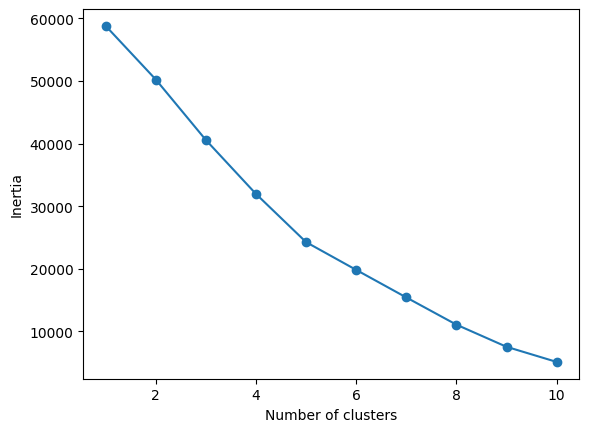

In [196]:
# prompt: use kmeans to create an elbow plot using the columns sales_quantity	vegetables	fruits	dairy	seafood	frozen_meat	pet_care	pet_food	stationery	beauty_and_personal_care	wellness_food	wellness_products	baby_needs	sales_quantity_average

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()
# Extract the relevant columns
data = category_df[['vegetables', 'fruits', 'dairy', 'seafood', 'frozen_meat', 'pet_care', 'pet_food', 'stationery', 'beauty_and_personal_care', 'wellness_food', 'wellness_products', 'baby_needs', 'sales_quantity_average','times_visited']]

# Normalize the data
data_normalized = scaler.fit_transform(data)

# Calculate inertia for different numbers of clusters
inertia = []
for i in range(1, 11):
  km = KMeans(n_clusters=i, random_state=0)
  km.fit(data_normalized)
  inertia.append(km.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [197]:
category_df.head()

customer_code  sales_quantity  vegetables  fruits  dairy  seafood  \
0             1            1031         402     496      0       12   
1            10            2685          33      38      0     1498   
2           100            1475          33      38      0       12   
3          1000             433         126     174      0       12   
4          1001             445         151     161      0       12   

   frozen_meat  pet_care  pet_food  stationery  beauty_and_personal_care  \
0           52         0         0          22                        24   
1         1047         0         0          22                        24   
2           52         0         0          22                      1295   
3           52         0         0          22                        24   
4           52         0         0          22                        24   

   wellness_food  wellness_products  baby_needs  time_difference_days  \
0             20                  0           3                   176   
1             20                  0           3                   179   
2             20                  0           3                   179   
3             20                  0           3                   179   
4             20                  0           3                   179   

   times_visited  sales_quantity_average  
0            142                1.239437  
1            171                1.046784  
2            145                1.234483  
3            144                1.243056  
4            144                1.243056

**Dividing to clusters**

In [198]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(data_normalized)
category_df['cluster'] = kmeans.labels_
category_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


customer_code  sales_quantity  vegetables  fruits  dairy  seafood  \
0             1            1031         402     496      0       12   
1            10            2685          33      38      0     1498   
2           100            1475          33      38      0       12   
3          1000             433         126     174      0       12   
4          1001             445         151     161      0       12   

   frozen_meat  pet_care  pet_food  stationery  beauty_and_personal_care  \
0           52         0         0          22                        24   
1         1047         0         0          22                        24   
2           52         0         0          22                      1295   
3           52         0         0          22                        24   
4           52         0         0          22                        24   

   wellness_food  wellness_products  baby_needs  time_difference_days  \
0             20                  0           3                   176   
1             20                  0           3                   179   
2             20                  0           3                   179   
3             20                  0           3                   179   
4             20                  0           3                   179   

   times_visited  sales_quantity_average  cluster  
0            142                1.239437        0  
1            171                1.046784        2  
2            145                1.234483        0  
3            144                1.243056        0  
4            144                1.243056        0

In [199]:
# prompt: output category_df into a csv file

category_df.to_csv('category_df.csv')


plotting against clusters

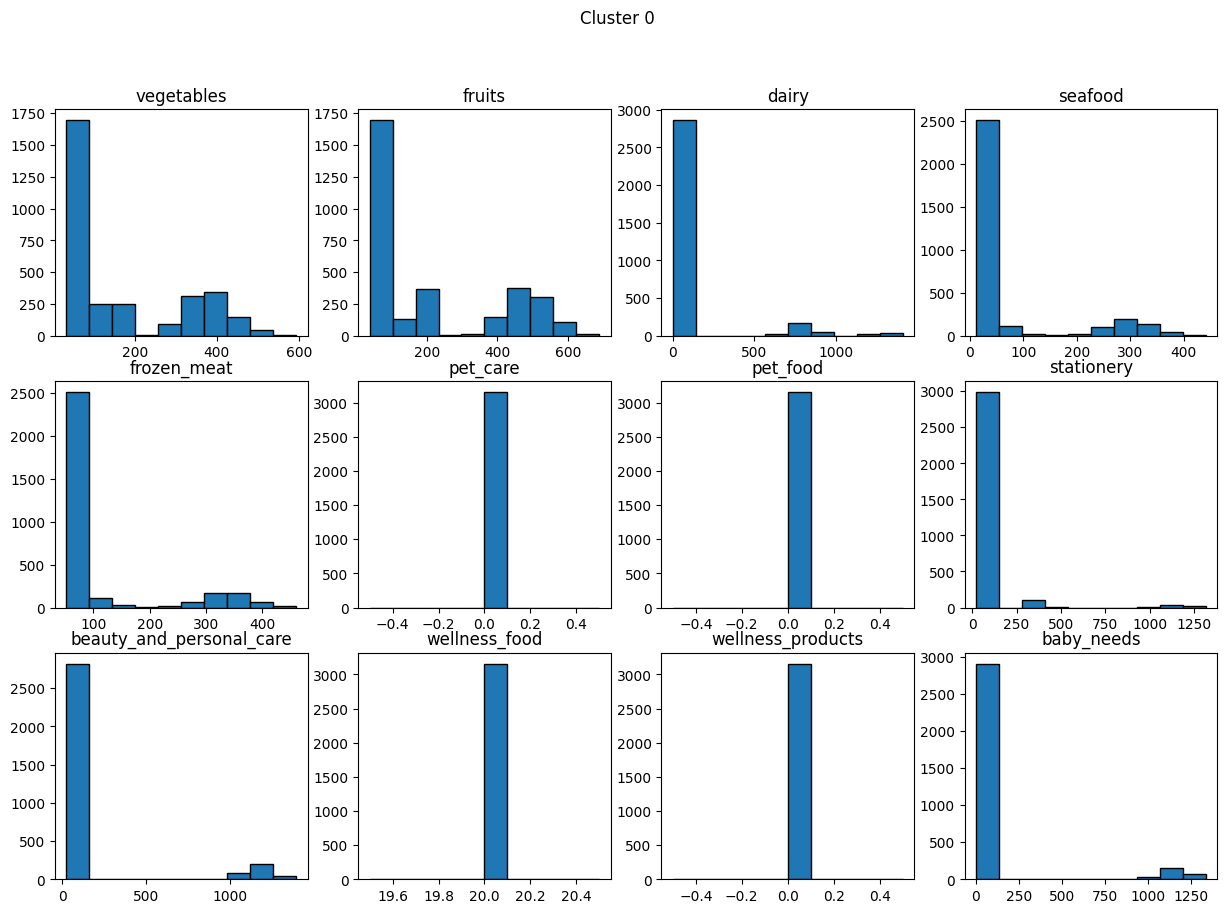

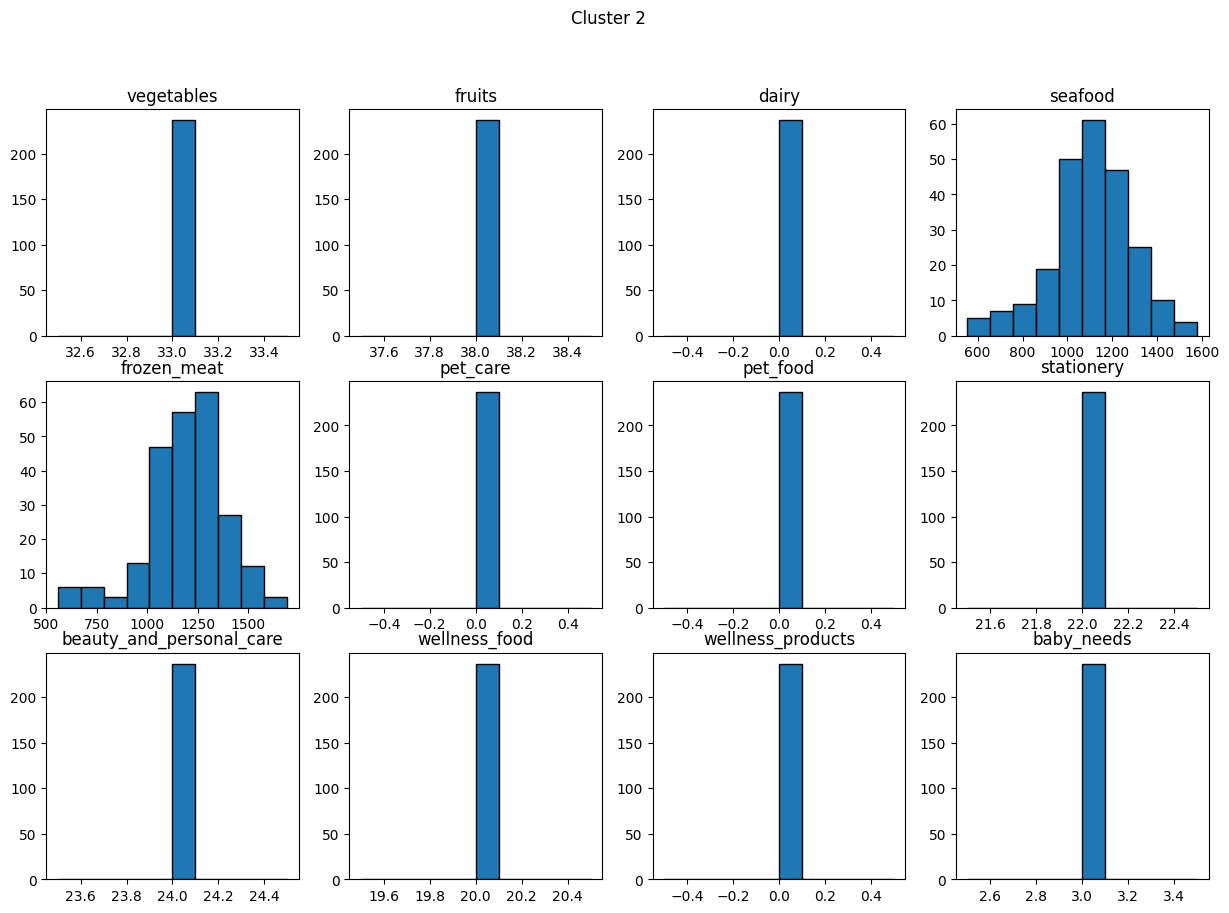

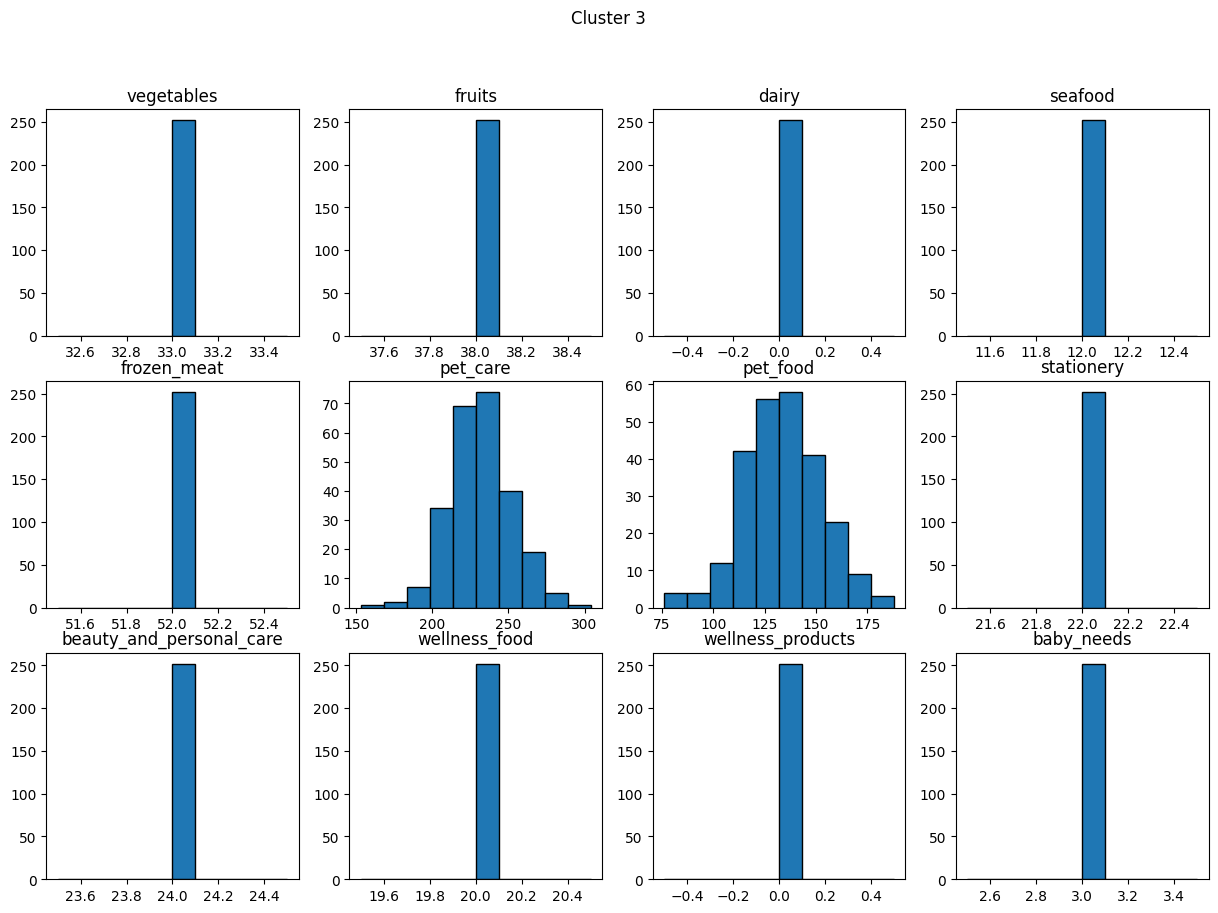

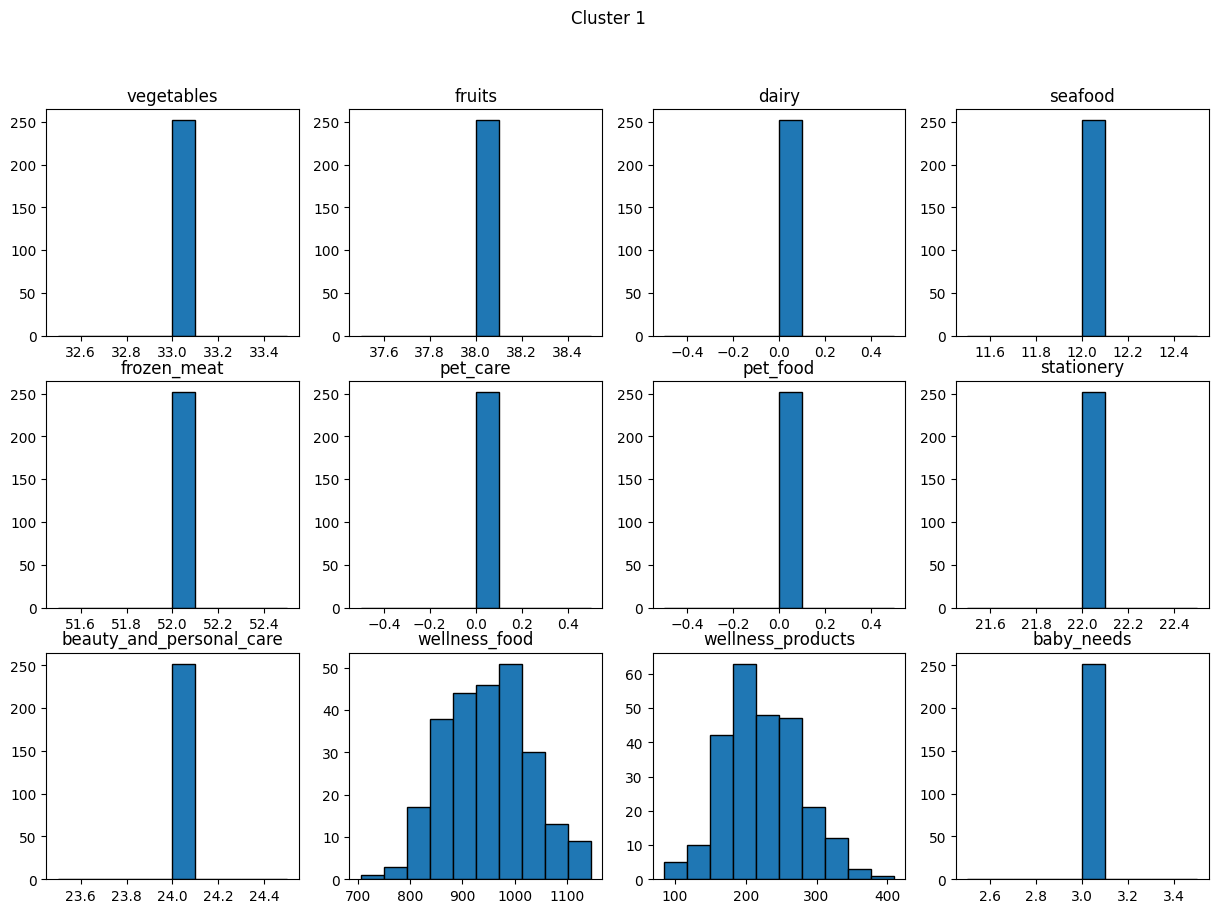

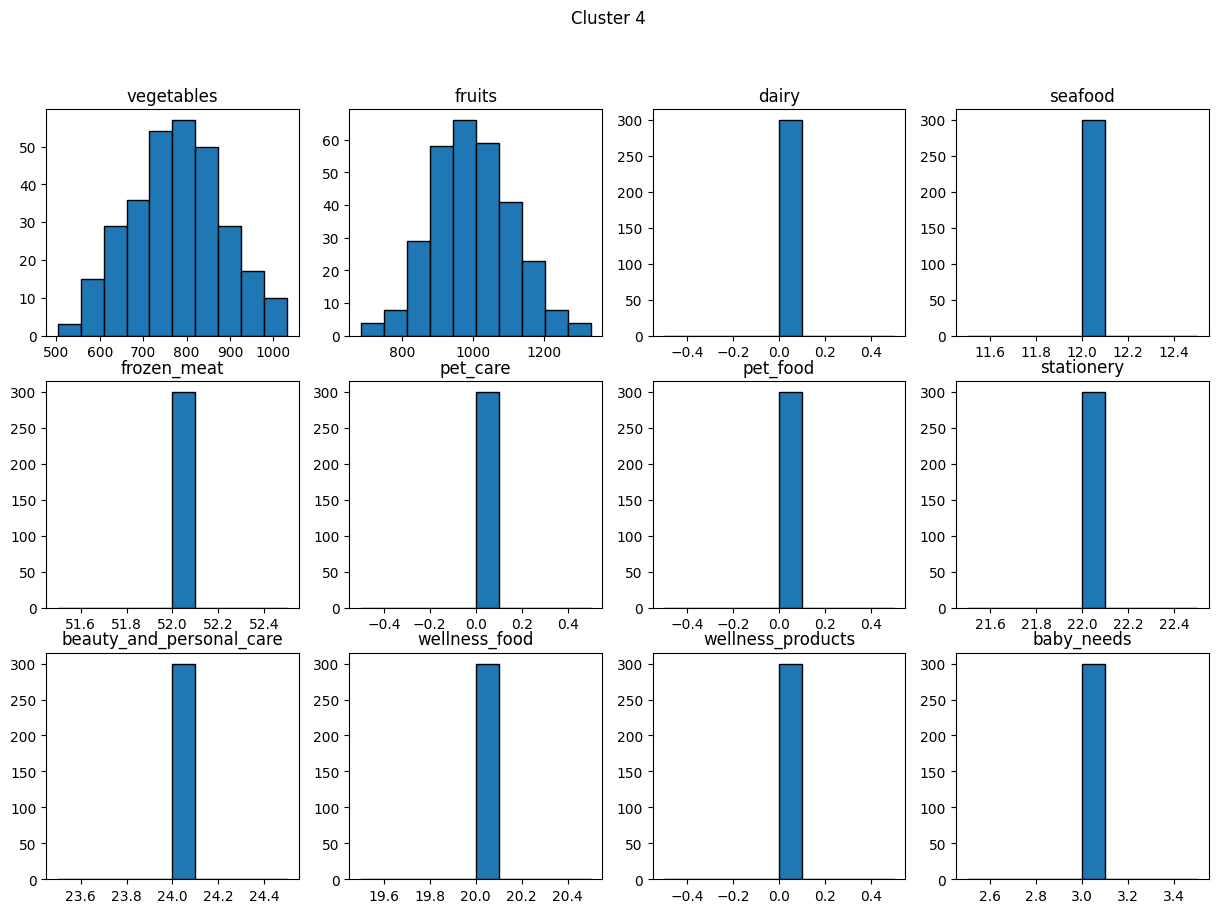

In [200]:
# prompt: view each cluster in a histogram against columns vegetables	fruits	dairy	seafood	frozen_meat	pet_care	pet_food	stationery	beauty_and_personal_care	wellness_food	wellness_products	baby_needs

import matplotlib.pyplot as plt

# Define the columns to plot
columns_to_plot = ['vegetables', 'fruits', 'dairy', 'seafood', 'frozen_meat', 'pet_care', 'pet_food', 'stationery', 'beauty_and_personal_care', 'wellness_food', 'wellness_products', 'baby_needs']

# Get unique cluster labels
unique_clusters = category_df['cluster'].unique()

# Loop through each cluster
for cluster in unique_clusters:
  # Create a new DataFrame for the current cluster
  cluster_df = category_df[category_df['cluster'] == cluster]

  # Initialize the figure
  plt.figure(figsize=(15, 10))

  # Loop through each column and plot its histogram
  for i, column in enumerate(columns_to_plot):
    plt.subplot(3, 4, i + 1)
    plt.hist(cluster_df[column], bins=10, edgecolor='black')
    plt.title(column)

  # Set the title for the current cluster
  plt.suptitle(f'Cluster {cluster}')

  # Display the plot
  plt.show()


# creating clusters based on item_name

In [201]:
name_df.head()

customer_code     transaction_time   item code  sales_quantity department  \
1            78  2023-01-12 08:08:00   item_cd_6              14      fresh   
2            78  2023-01-17 12:15:00   item_cd_2              14      fresh   
3            78  2023-01-25 16:37:00  item_cd_16              11      fresh   
4            78  2023-02-03 15:11:00   item_cd_3              14      fresh   
5            78  2023-02-08 12:56:00   item_cd_1              10      fresh   

  item_category item_name  
1    vegetables  beetroot  
2    vegetables  potatoes  
3        fruits     mango  
4    vegetables   pumpkin  
5    vegetables    carrot

In [202]:
# prompt: i want to get the unique item_category as columns and enter the sales_quantity values in each column added to the same df.

import numpy as np
unique_names = name_df['item_name'].unique()
for name in unique_names:
  name_df[name] = np.where(name_df['item_name'] == name, name_df['sales_quantity'], 0)
name_df.head()

customer_code     transaction_time   item code  sales_quantity department  \
1            78  2023-01-12 08:08:00   item_cd_6              14      fresh   
2            78  2023-01-17 12:15:00   item_cd_2              14      fresh   
3            78  2023-01-25 16:37:00  item_cd_16              11      fresh   
4            78  2023-02-03 15:11:00   item_cd_3              14      fresh   
5            78  2023-02-08 12:56:00   item_cd_1              10      fresh   

  item_category item_name  beetroot  potatoes  mango  ...  protein_bars  \
1    vegetables  beetroot        14         0      0  ...             0   
2    vegetables  potatoes         0        14      0  ...             0   
3        fruits     mango         0         0     11  ...             0   
4    vegetables   pumpkin         0         0      0  ...             0   
5    vegetables    carrot         0         0      0  ...             0   

   green_tea_bags_25_pack  yoga_mat  smoothie_mix_6_packs  \
1                       0         0                     0   
2                       0         0                     0   
3                       0         0                     0   
4                       0         0                     0   
5                       0         0                     0   

   multivitamin_bottle  baby_diapers  silicon pacifiers  baby_shampoo  \
1                    0             0                  0             0   
2                    0             0                  0             0   
3                    0             0                  0             0   
4                    0             0                  0             0   
5                    0             0                  0             0   

   baby_cream  baby_soap  
1           0          0  
2           0          0  
3           0          0  
4           0          0  
5           0          0  

[5 rows x 77 columns]

In [203]:


# prompt: drop transaction_time,item code in category_df, department and combine all the rows having the same customer_code while adding the values in each column

# Drop unnecessary columns
name_df.drop(['transaction_time', 'item code', 'department','item_category','item_name'], axis=1, inplace=True)

# Combine rows with the same customer_code and sum the values
name_df = name_df.groupby('customer_code').sum()

# Print the first few rows of the resulting DataFrame



In [204]:
name_df.head()

sales_quantity  beetroot  potatoes  mango  pumpkin  carrot  \
customer_code                                                               
1                        1031        93        49     26       59      29   
10                       2685        15         0      2        0       0   
100                      1475        15         0      2        0       0   
1000                      433        38        15     20       23      14   
1001                      445        51        10     20       19      12   

               fuji apple  capsicum  tomatoes  orange  ...  protein_bars  \
customer_code                                          ...                 
1                      87        71        26      41  ...             0   
10                     14        11         0       0  ...             0   
100                    14        11         0       0  ...             0   
1000                   43        15         6       7  ...             0   
1001                   21        25        11      15  ...             0   

               green_tea_bags_25_pack  yoga_mat  smoothie_mix_6_packs  \
customer_code                                                           
1                                  11         0                     0   
10                                 11         0                     0   
100                                11         0                     0   
1000                               11         0                     0   
1001                               11         0                     0   

               multivitamin_bottle  baby_diapers  silicon pacifiers  \
customer_code                                                         
1                                9             2                  1   
10                               9             2                  1   
100                              9             2                  1   
1000                             9             2                  1   
1001                             9             2                  1   

               baby_shampoo  baby_cream  baby_soap  
customer_code                                       
1                         0           0          0  
10                        0           0          0  
100                       0           0          0  
1000                      0           0          0  
1001                      0           0          0  

[5 rows x 71 columns]

In [205]:
name_df = name_df.merge(time_df, on='customer_code', how='left')
name_df.head()

customer_code  sales_quantity  beetroot  potatoes  mango  pumpkin  carrot  \
0             1            1031        93        49     26       59      29   
1            10            2685        15         0      2        0       0   
2           100            1475        15         0      2        0       0   
3          1000             433        38        15     20       23      14   
4          1001             445        51        10     20       19      12   

   fuji apple  capsicum  tomatoes  ...  green_tea_bags_25_pack  yoga_mat  \
0          87        71        26  ...                      11         0   
1          14        11         0  ...                      11         0   
2          14        11         0  ...                      11         0   
3          43        15         6  ...                      11         0   
4          21        25        11  ...                      11         0   

   smoothie_mix_6_packs  multivitamin_bottle  baby_diapers  silicon pacifiers  \
0                     0                    9             2                  1   
1                     0                    9             2                  1   
2                     0                    9             2                  1   
3                     0                    9             2                  1   
4                     0                    9             2                  1   

   baby_shampoo  baby_cream  baby_soap  times_visited  
0             0           0          0            142  
1             0           0          0            171  
2             0           0          0            145  
3             0           0          0            144  
4             0           0          0            144  

[5 rows x 73 columns]

In [206]:
sales_average_df = category_df[['customer_code', 'sales_quantity_average']].drop_duplicates()
sales_average_df.head()

customer_code  sales_quantity_average
0             1                1.239437
1            10                1.046784
2           100                1.234483
3          1000                1.243056
4          1001                1.243056

In [207]:
name_df = name_df.merge(sales_average_df, on='customer_code', how='left')


In [208]:
name_df.head()

customer_code  sales_quantity  beetroot  potatoes  mango  pumpkin  carrot  \
0             1            1031        93        49     26       59      29   
1            10            2685        15         0      2        0       0   
2           100            1475        15         0      2        0       0   
3          1000             433        38        15     20       23      14   
4          1001             445        51        10     20       19      12   

   fuji apple  capsicum  tomatoes  ...  yoga_mat  smoothie_mix_6_packs  \
0          87        71        26  ...         0                     0   
1          14        11         0  ...         0                     0   
2          14        11         0  ...         0                     0   
3          43        15         6  ...         0                     0   
4          21        25        11  ...         0                     0   

   multivitamin_bottle  baby_diapers  silicon pacifiers  baby_shampoo  \
0                    9             2                  1             0   
1                    9             2                  1             0   
2                    9             2                  1             0   
3                    9             2                  1             0   
4                    9             2                  1             0   

   baby_cream  baby_soap  times_visited  sales_quantity_average  
0           0          0            142                1.239437  
1           0          0            171                1.046784  
2           0          0            145                1.234483  
3           0          0            144                1.243056  
4           0          0            144                1.243056  

[5 rows x 74 columns]

In [209]:
name_df.columns

Index(['customer_code', 'sales_quantity', 'beetroot', 'potatoes', 'mango',
       'pumpkin', 'carrot', 'fuji apple', 'capsicum', 'tomatoes', 'orange',
       'pineapple', 'cucumber', 'grapes', 'papaya', 'banana', 'green apple',
       'green_beans', 'butter', 'set yogurt', 'chocolate ice cream',
       'milk carton', 'drinking yogurt', 'cheese slices', 'vanialla ice cream',
       'cheese wedges', 'seer_fish', 'chicken_breast_slices_500g', 'prawns',
       'chicken_sausages_150g', 'tuna', 'sea crabs', 'chicken_meatballs_250g',
       'cuttlefish', 'beef_meatballs_200g', 'pork_bacon_500g', 'dog collar',
       'cat litter', 'slicker brush', 'cat food', 'dog leash', 'pet shampoo',
       'dog treats', 'chicken and liver treats', 'ballpoint_pens_blue_6_pc',
       'single_rule_cr_book_120p', 'glue_stick', 'highlighter_6_pack',
       'single_rule_exercise_book_120p', 'stapler_large',
       'a5_sprial_notebook_100p', 'pencils_hb_6_pc', 'whiteboard_marker_blue',
       'drawing_book_small_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

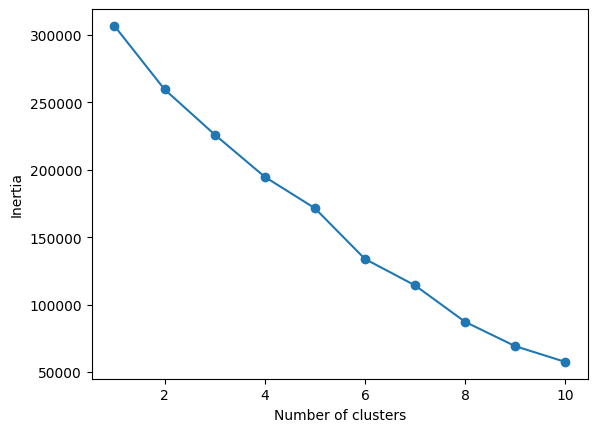

In [210]:
# prompt: use kmeans to create an elbow plot using the columns sales_quantity	vegetables	fruits	dairy	seafood	frozen_meat	pet_care	pet_food	stationery	beauty_and_personal_care	wellness_food	wellness_products	baby_needs	sales_quantity_average

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()
# Extract the relevant columns
data = name_df[['customer_code', 'beetroot', 'potatoes', 'mango',
       'pumpkin', 'carrot', 'fuji apple', 'capsicum', 'tomatoes', 'orange',
       'pineapple', 'cucumber', 'grapes', 'papaya', 'banana', 'green apple',
       'green_beans', 'butter', 'set yogurt', 'chocolate ice cream',
       'milk carton', 'drinking yogurt', 'cheese slices', 'vanialla ice cream',
       'cheese wedges', 'seer_fish', 'chicken_breast_slices_500g', 'prawns',
       'chicken_sausages_150g', 'tuna', 'sea crabs', 'chicken_meatballs_250g',
       'cuttlefish', 'beef_meatballs_200g', 'pork_bacon_500g', 'dog collar',
       'cat litter', 'slicker brush', 'cat food', 'dog leash', 'pet shampoo',
       'dog treats', 'chicken and liver treats', 'ballpoint_pens_blue_6_pc',
       'single_rule_cr_book_120p', 'glue_stick', 'highlighter_6_pack',
       'single_rule_exercise_book_120p', 'stapler_large',
       'a5_sprial_notebook_100p', 'pencils_hb_6_pc', 'whiteboard_marker_blue',
       'drawing_book_small_20pg', 'soap', 'perfume', 'body_wash',
       'conditioner', 'facial_cleanser', 'sunscreen', 'lip_balm', 'shampoo',
       'protein_bars', 'green_tea_bags_25_pack', 'yoga_mat',
       'smoothie_mix_6_packs', 'multivitamin_bottle', 'baby_diapers',
       'silicon pacifiers', 'baby_shampoo', 'baby_cream', 'baby_soap',
       'times_visited', 'sales_quantity_average']]

# Normalize the data
data_normalized = scaler.fit_transform(data)

# Calculate inertia for different numbers of clusters
inertia = []
for i in range(1, 11):
  km = KMeans(n_clusters=i, random_state=0)
  km.fit(data_normalized)
  inertia.append(km.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [211]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(data_normalized)
name_df['cluster'] = kmeans.labels_
name_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


customer_code  sales_quantity  beetroot  potatoes  mango  pumpkin  carrot  \
0             1            1031        93        49     26       59      29   
1            10            2685        15         0      2        0       0   
2           100            1475        15         0      2        0       0   
3          1000             433        38        15     20       23      14   
4          1001             445        51        10     20       19      12   

   fuji apple  capsicum  tomatoes  ...  smoothie_mix_6_packs  \
0          87        71        26  ...                     0   
1          14        11         0  ...                     0   
2          14        11         0  ...                     0   
3          43        15         6  ...                     0   
4          21        25        11  ...                     0   

   multivitamin_bottle  baby_diapers  silicon pacifiers  baby_shampoo  \
0                    9             2                  1             0   
1                    9             2                  1             0   
2                    9             2                  1             0   
3                    9             2                  1             0   
4                    9             2                  1             0   

   baby_cream  baby_soap  times_visited  sales_quantity_average  cluster  
0           0          0            142                1.239437        1  
1           0          0            171                1.046784        2  
2           0          0            145                1.234483        5  
3           0          0            144                1.243056        1  
4           0          0            144                1.243056        1  

[5 rows x 75 columns]

In [212]:
# prompt: get count of rows grouped by cluster

cluster_counts = name_df.groupby('cluster')['customer_code'].count()
print(cluster_counts)


cluster
0     300
1    2780
2     237
3     295
4     252
5     336
Name: customer_code, dtype: int64


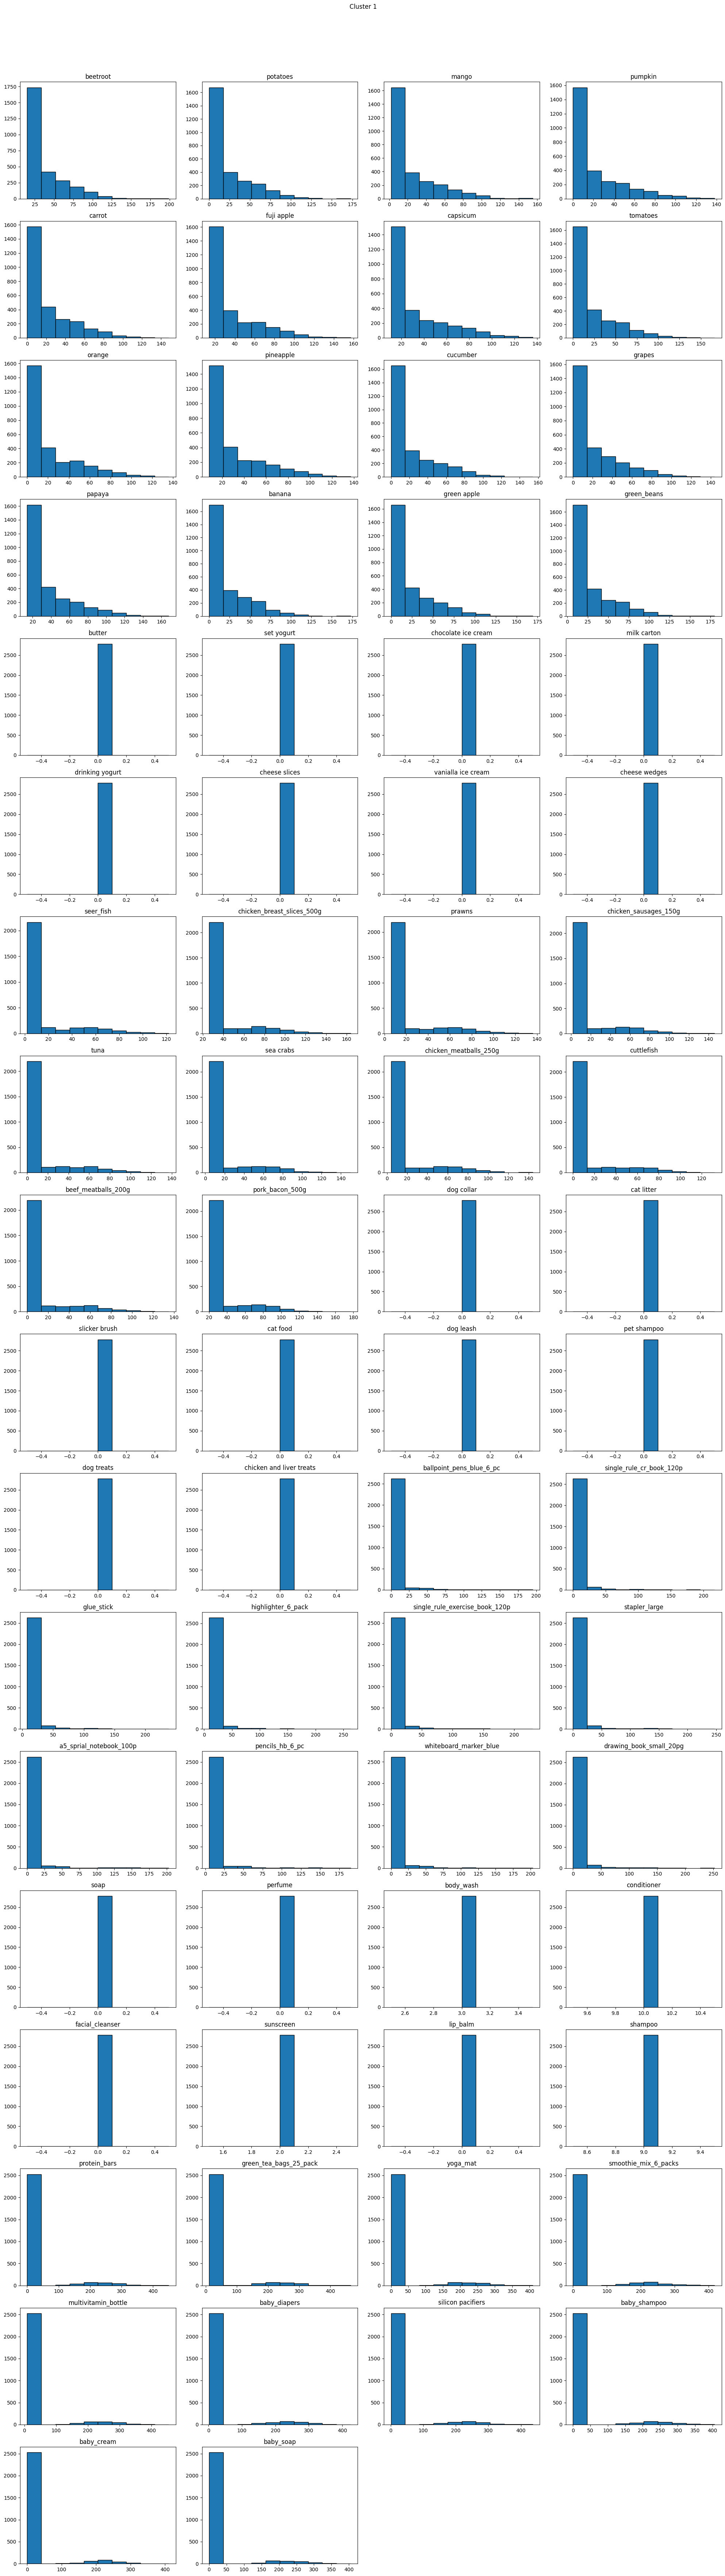

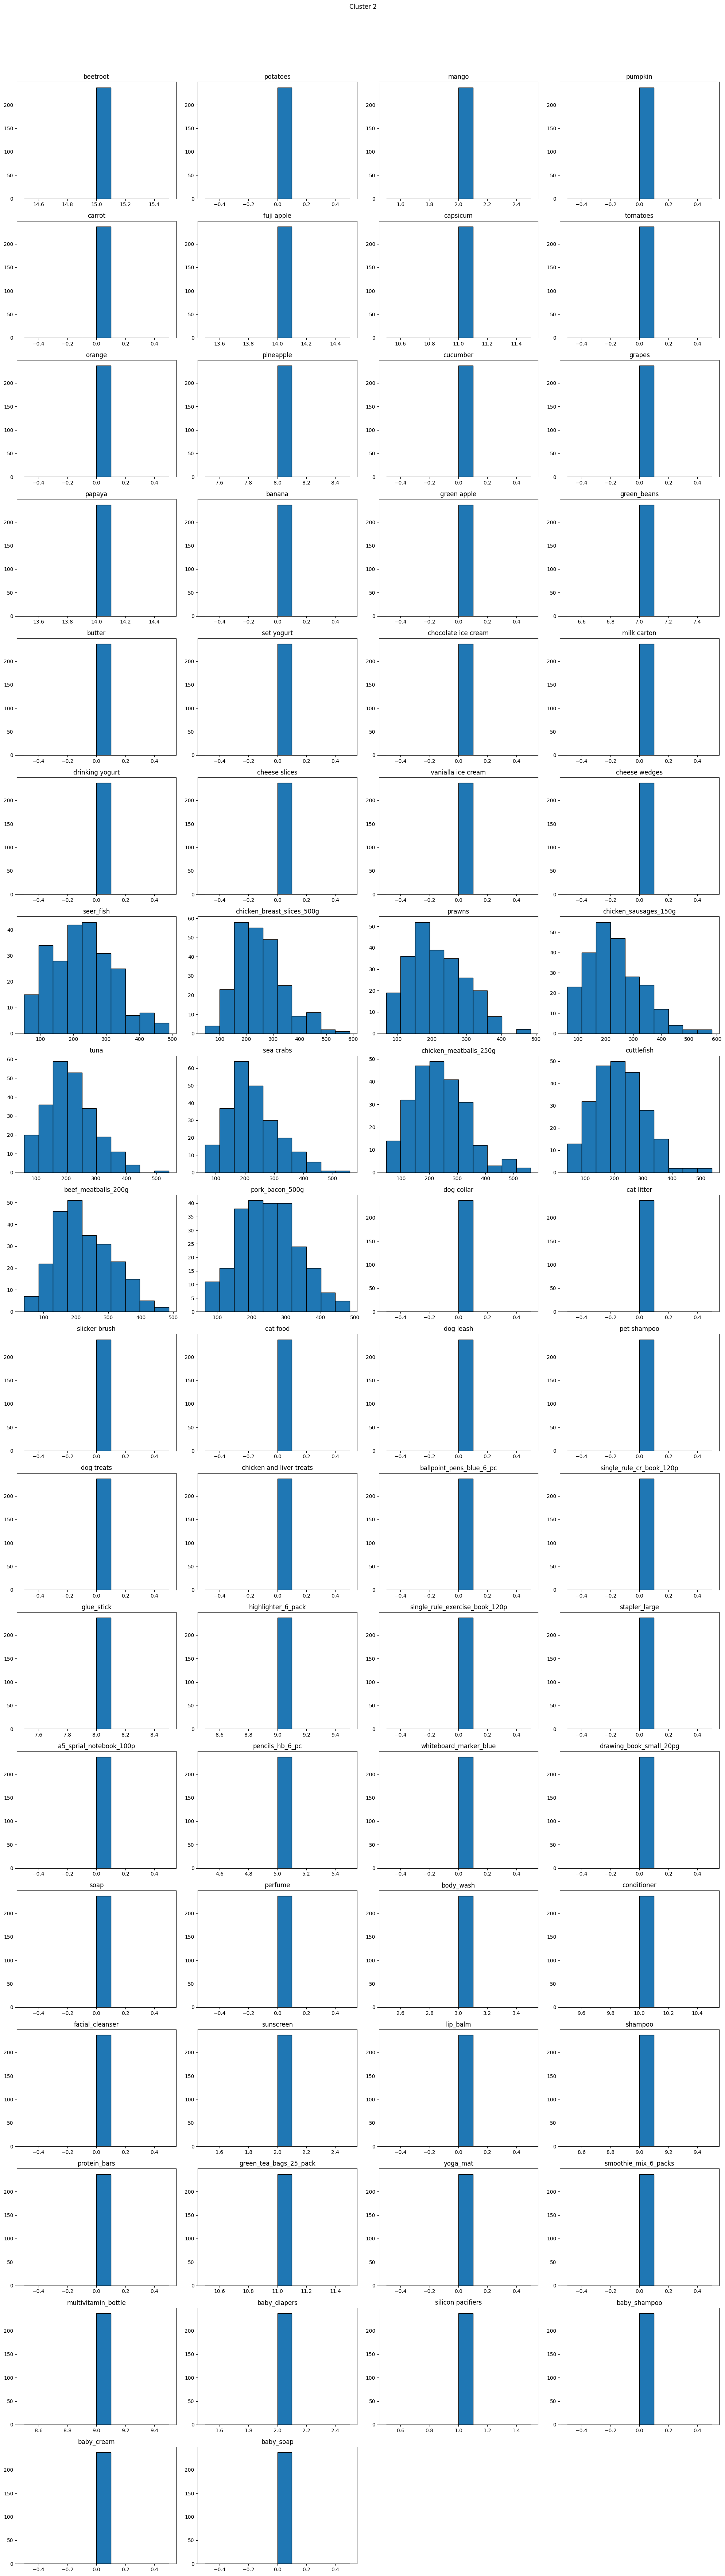

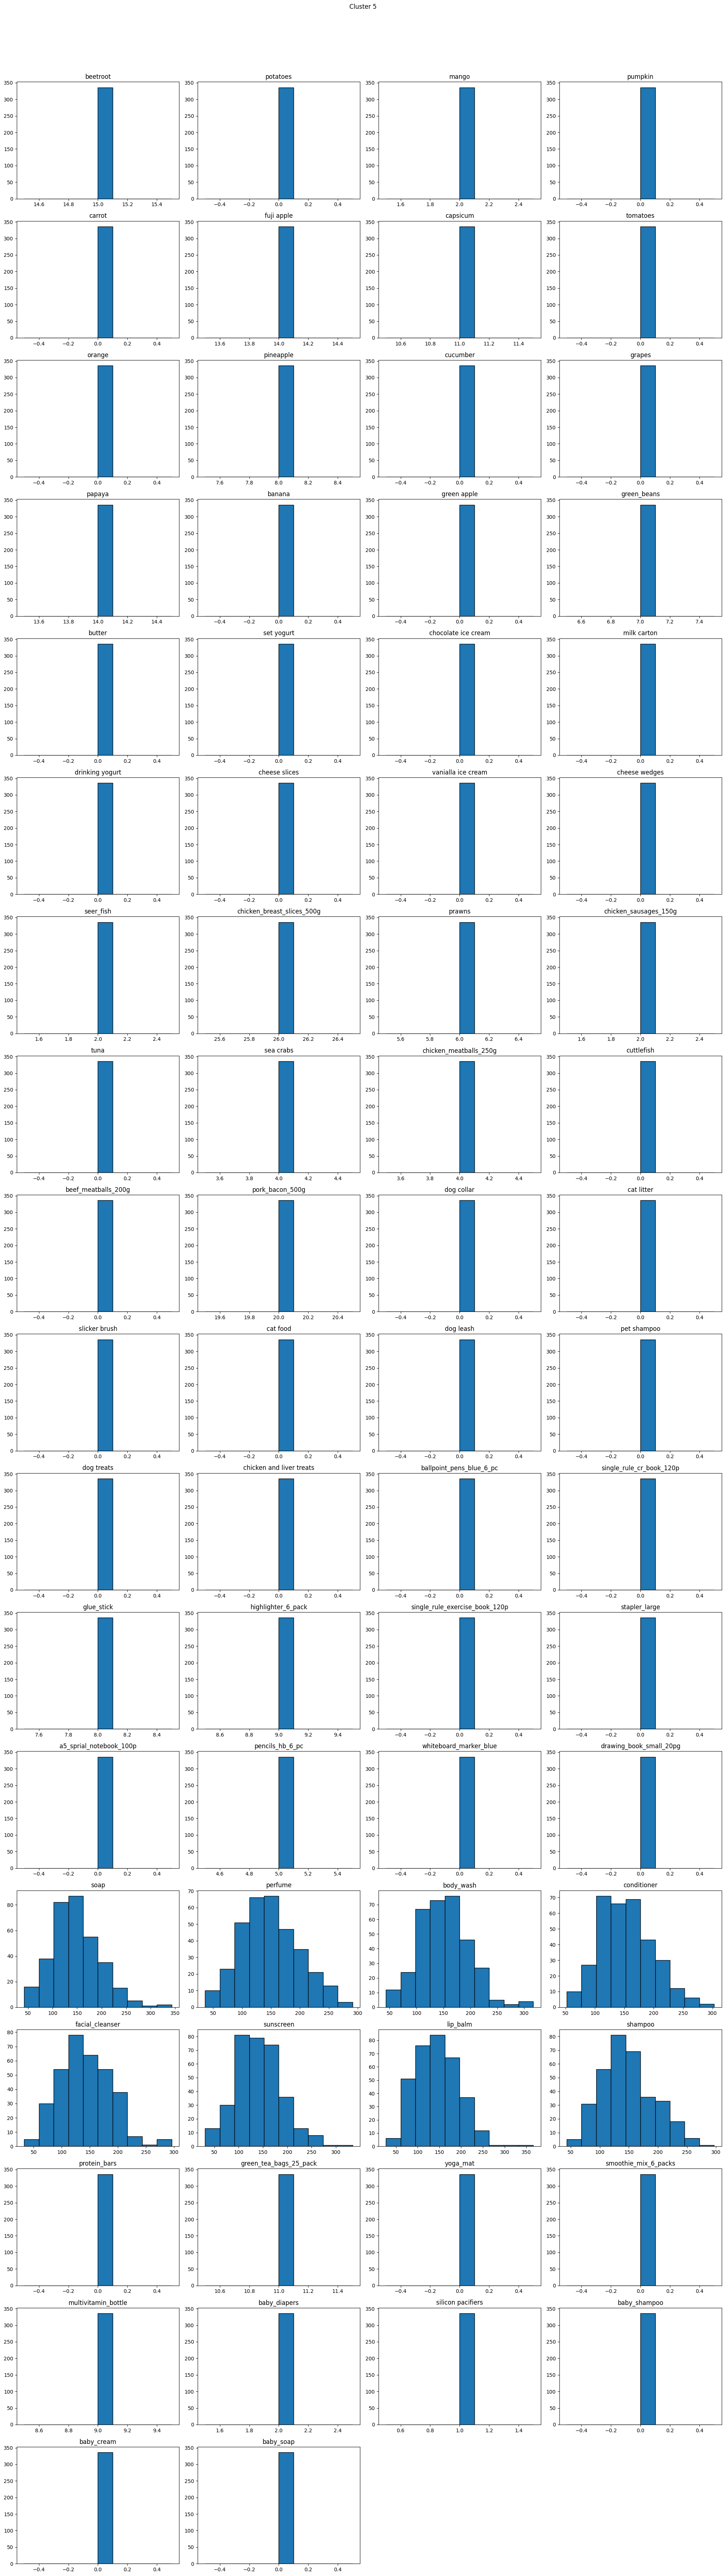

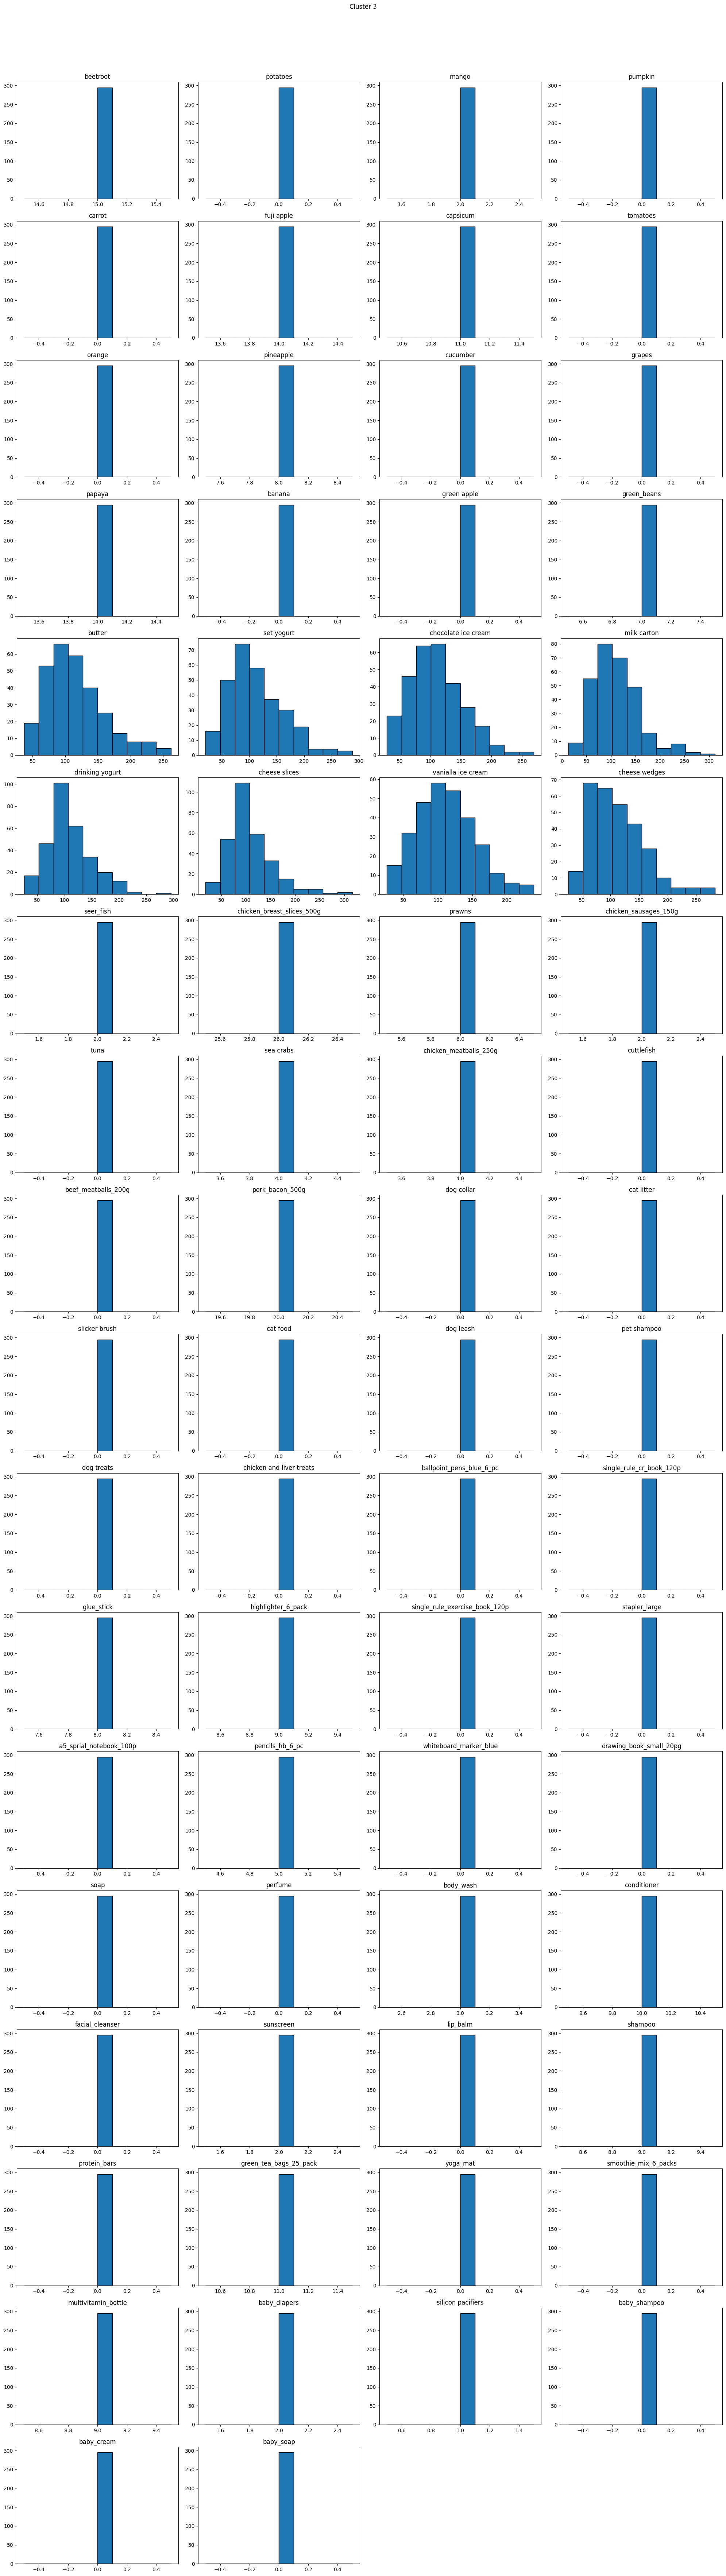

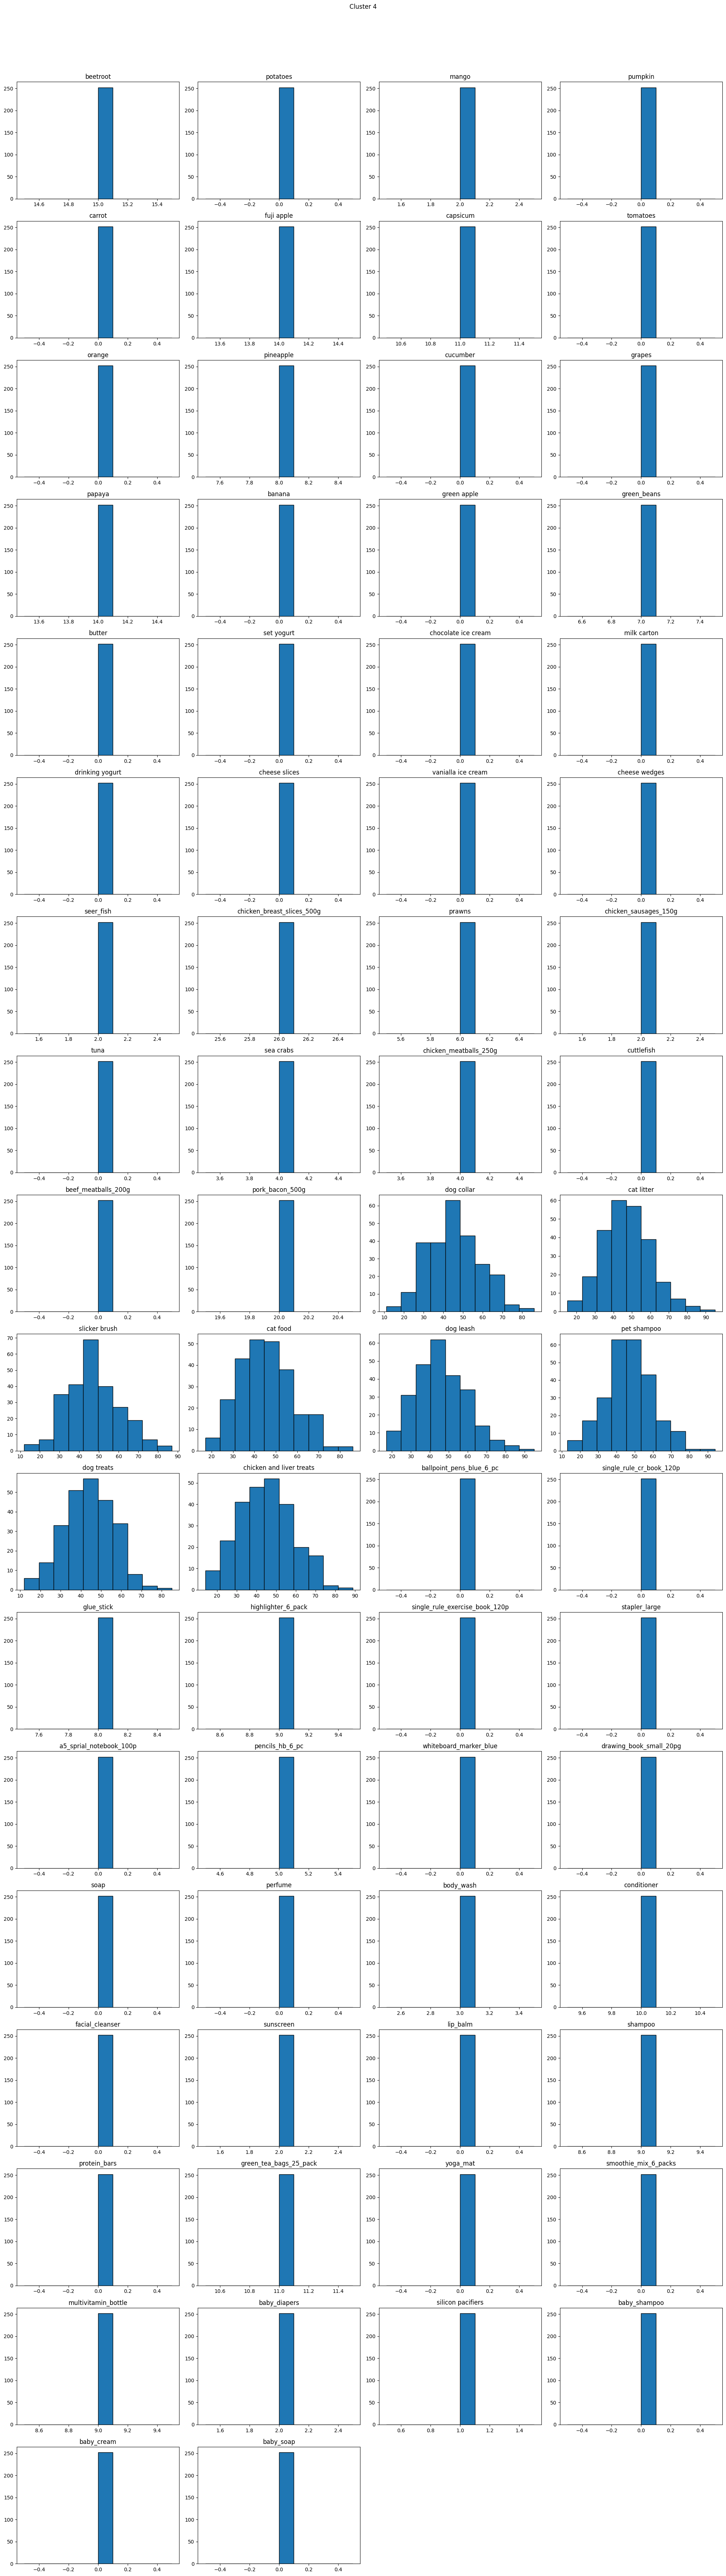

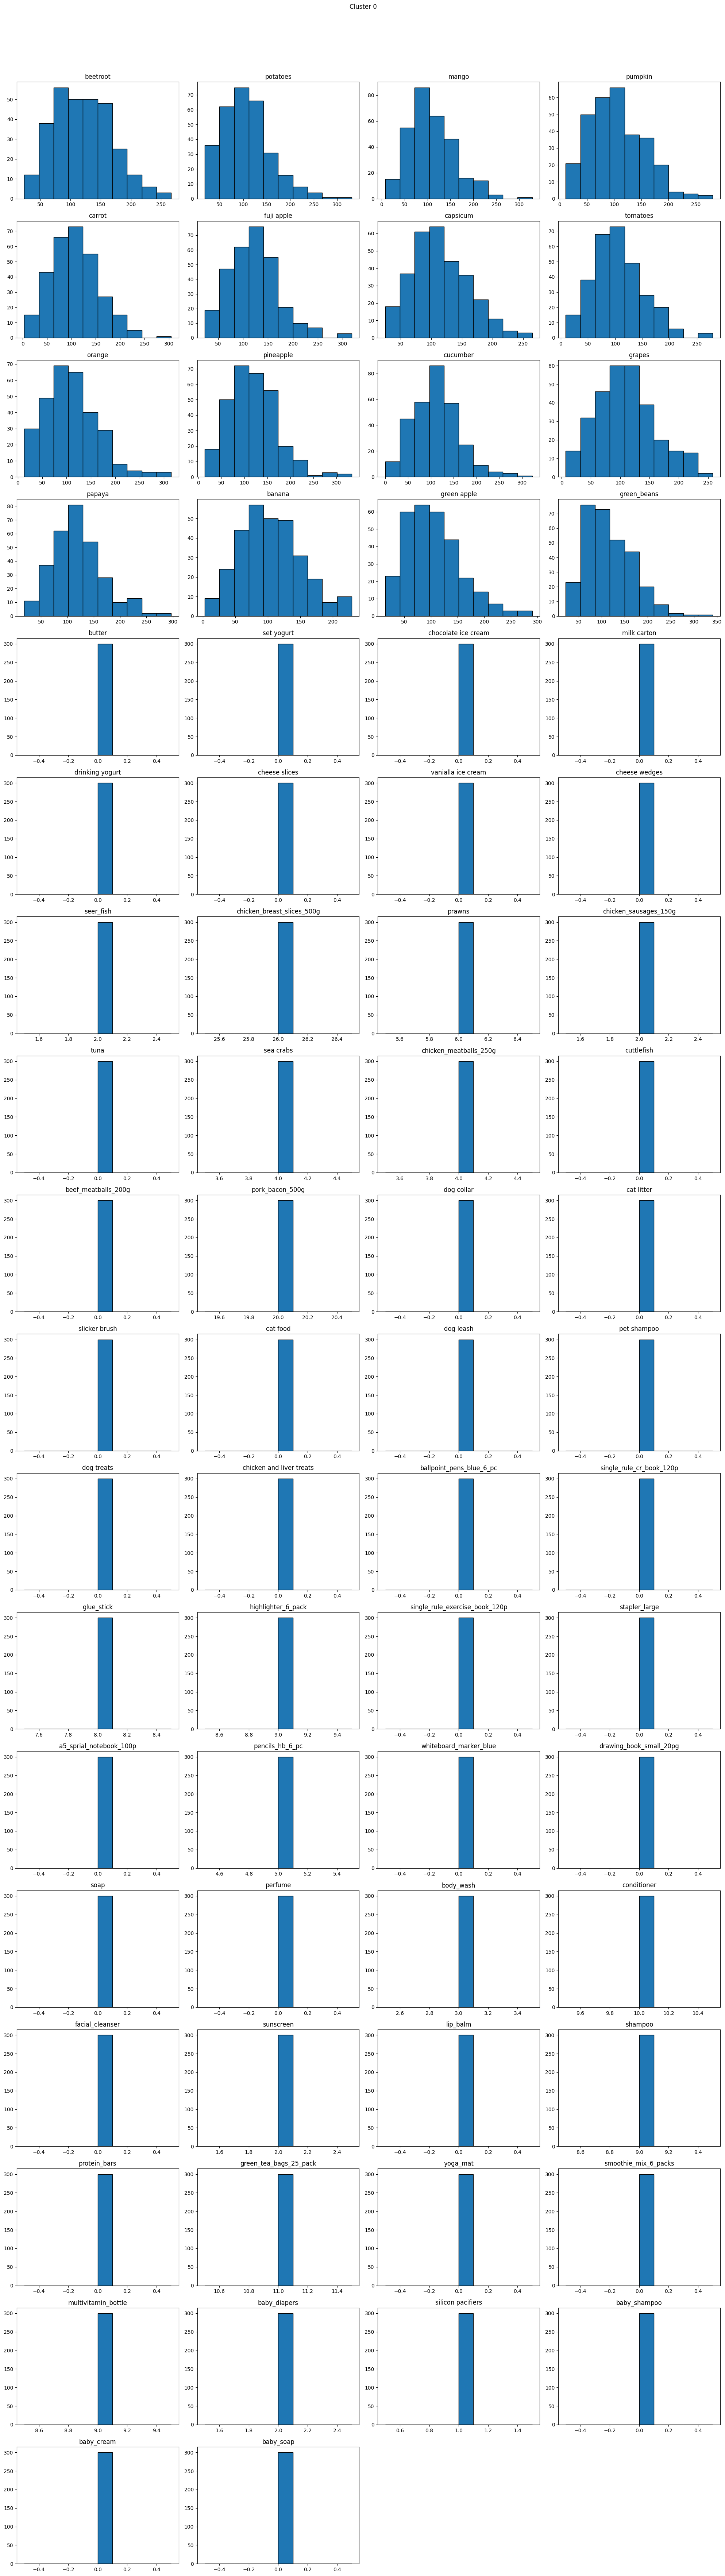

In [213]:
import matplotlib.pyplot as plt

# Define the columns to plot
columns_to_plot = ['beetroot', 'potatoes', 'mango',
       'pumpkin', 'carrot', 'fuji apple', 'capsicum', 'tomatoes', 'orange',
       'pineapple', 'cucumber', 'grapes', 'papaya', 'banana', 'green apple',
       'green_beans', 'butter', 'set yogurt', 'chocolate ice cream',
       'milk carton', 'drinking yogurt', 'cheese slices', 'vanialla ice cream',
       'cheese wedges', 'seer_fish', 'chicken_breast_slices_500g', 'prawns',
       'chicken_sausages_150g', 'tuna', 'sea crabs', 'chicken_meatballs_250g',
       'cuttlefish', 'beef_meatballs_200g', 'pork_bacon_500g', 'dog collar',
       'cat litter', 'slicker brush', 'cat food', 'dog leash', 'pet shampoo',
       'dog treats', 'chicken and liver treats', 'ballpoint_pens_blue_6_pc',
       'single_rule_cr_book_120p', 'glue_stick', 'highlighter_6_pack',
       'single_rule_exercise_book_120p', 'stapler_large',
       'a5_sprial_notebook_100p', 'pencils_hb_6_pc', 'whiteboard_marker_blue',
       'drawing_book_small_20pg', 'soap', 'perfume', 'body_wash',
       'conditioner', 'facial_cleanser', 'sunscreen', 'lip_balm', 'shampoo',
       'protein_bars', 'green_tea_bags_25_pack', 'yoga_mat',
       'smoothie_mix_6_packs', 'multivitamin_bottle', 'baby_diapers',
       'silicon pacifiers', 'baby_shampoo', 'baby_cream', 'baby_soap',
       ]

# Calculate the number of rows needed for the subplot grid
import math
num_columns = len(columns_to_plot)
num_rows = math.ceil(num_columns / 4)

# Get unique cluster labels
unique_clusters = name_df['cluster'].unique()

# Loop through each cluster
for cluster in unique_clusters:
    # Create a new DataFrame for the current cluster
    cluster_df = name_df[name_df['cluster'] == cluster]

    # Initialize the figure
    plt.figure(figsize=(20, 4 * num_rows))  # Adjust figure size to fit all subplots

    # Loop through each column and plot its histogram
    for i, column in enumerate(columns_to_plot):
        plt.subplot(num_rows, 4, i + 1)
        plt.hist(cluster_df[column], bins=10, edgecolor='black')
        plt.title(column)

    # Set the title for the current cluster
    plt.suptitle(f'Cluster {cluster}')

    # Adjust layout to prevent overlap
    plt.tight_layout(rect=[0, 0, 1, 0.96])

    # Display the plot
    plt.show()


In [214]:
department_df.head()

customer_code     transaction_time   item code  sales_quantity department  \
1            78  2023-01-12 08:08:00   item_cd_6              14      fresh   
2            78  2023-01-17 12:15:00   item_cd_2              14      fresh   
3            78  2023-01-25 16:37:00  item_cd_16              11      fresh   
4            78  2023-02-03 15:11:00   item_cd_3              14      fresh   
5            78  2023-02-08 12:56:00   item_cd_1              10      fresh   

  item_category item_name  
1    vegetables  beetroot  
2    vegetables  potatoes  
3        fruits     mango  
4    vegetables   pumpkin  
5    vegetables    carrot

In [215]:
# prompt: i want to get the unique item_category as columns and enter the sales_quantity values in each column added to the same df.

import numpy as np
unique_names = department_df['department'].unique()
for name in unique_names:
  department_df[name] = np.where(department_df['department'] == name, department_df['sales_quantity'], 0)
department_df.head()

customer_code     transaction_time   item code  sales_quantity department  \
1            78  2023-01-12 08:08:00   item_cd_6              14      fresh   
2            78  2023-01-17 12:15:00   item_cd_2              14      fresh   
3            78  2023-01-25 16:37:00  item_cd_16              11      fresh   
4            78  2023-02-03 15:11:00   item_cd_3              14      fresh   
5            78  2023-02-08 12:56:00   item_cd_1              10      fresh   

  item_category item_name  fresh  animal products  pet_products  homeware  \
1    vegetables  beetroot     14                0             0         0   
2    vegetables  potatoes     14                0             0         0   
3        fruits     mango     11                0             0         0   
4    vegetables   pumpkin     14                0             0         0   
5    vegetables    carrot     10                0             0         0   

   Hygiene  lifestyle  household  
1        0          0          0  
2        0          0          0  
3        0          0          0  
4        0          0          0  
5        0          0          0

In [216]:


# prompt: drop transaction_time,item code in category_df, department and combine all the rows having the same customer_code while adding the values in each column

# Drop unnecessary columns
# department_df.drop(['transaction_time', 'item code', 'department','item_category','item_name'], axis=1, inplace=True)

# Combine rows with the same customer_code and sum the values
department_df = department_df.groupby('customer_code').sum()

# Print the first few rows of the resulting DataFrame



In [217]:
department_df.head()

transaction_time  \
customer_code                                                      
1              2023-01-12 15:14:002023-01-16 16:25:002023-01-...   
10             2023-01-09 10:13:002023-01-18 15:17:002023-01-...   
100            2023-01-14 13:57:002023-01-20 13:15:002023-01-...   
1000           2023-01-09 09:08:002023-01-20 14:47:002023-01-...   
1001           2023-01-09 12:56:002023-01-18 09:00:002023-01-...   

                                                       item code  \
customer_code                                                      
1              item_cd_5item_cd_10item_cd_7item_cd_9item_cd_9...   
10             item_cd_69item_cd_67item_cd_69item_cd_65item_c...   
100            item_cd_32item_cd_26item_cd_28item_cd_26item_c...   
1000           item_cd_15item_cd_12item_cd_12item_cd_11item_c...   
1001           item_cd_9item_cd_6item_cd_10item_cd_13item_cd_...   

               sales_quantity  \
customer_code                   
1                        1031   
10                       2685   
100                      1475   
1000                      433   
1001                      445   

                                                      department  \
customer_code                                                      
1              freshfreshfreshfreshfreshfreshfreshfreshfreshf...   
10             animal productsanimal productsanimal productsa...   
100            HygieneHygieneHygieneHygieneHygieneHygieneHygi...   
1000           freshfreshfreshfreshfreshfreshfreshfreshfreshf...   
1001           freshfreshfreshfreshfreshfreshfreshfreshfreshf...   

                                                   item_category  \
customer_code                                                      
1              vegetablesfruitsvegetablesfruitsfruitsfruitsfr...   
10             seafoodseafoodseafoodfrozen_meatfrozen_meatsea...   
100            beauty_and_personal_carebeauty_and_personal_ca...   
1000           fruitsfruitsfruitsfruitsfruitsfruitsfruitsfrui...   
1001           fruitsvegetablesfruitsfruitsvegetablesfruitsfr...   

                                                       item_name  fresh  \
customer_code                                                             
1              green_beanspapayacapsicumbananabananapineapple...    898   
10             seer_fishcuttlefishseer_fishbeef_meatballs_200...     71   
100            sunscreenconditionerfacial_cleanserconditioner...     71   
1000           grapesgreen applegreen applefuji applefuji app...    300   
1001           bananabeetrootpapayapineapplebeetrootpapayagre...    312   

               animal products  pet_products  homeware  Hygiene  lifestyle  \
customer_code                                                                
1                           64             0        22       26         20   
10                        2545             0        22       26         20   
100                         64             0        22     1297         20   
1000                        64             0        22       26         20   
1001                        64             0        22       26         20   

               household  
customer_code             
1                      1  
10                     1  
100                    1  
1000                   1  
1001                   1

In [218]:
department_df = department_df.merge(time_df, on='customer_code', how='left')
department_df.head()

customer_code                                   transaction_time  \
0             1  2023-01-12 15:14:002023-01-16 16:25:002023-01-...   
1            10  2023-01-09 10:13:002023-01-18 15:17:002023-01-...   
2           100  2023-01-14 13:57:002023-01-20 13:15:002023-01-...   
3          1000  2023-01-09 09:08:002023-01-20 14:47:002023-01-...   
4          1001  2023-01-09 12:56:002023-01-18 09:00:002023-01-...   

                                           item code  sales_quantity  \
0  item_cd_5item_cd_10item_cd_7item_cd_9item_cd_9...            1031   
1  item_cd_69item_cd_67item_cd_69item_cd_65item_c...            2685   
2  item_cd_32item_cd_26item_cd_28item_cd_26item_c...            1475   
3  item_cd_15item_cd_12item_cd_12item_cd_11item_c...             433   
4  item_cd_9item_cd_6item_cd_10item_cd_13item_cd_...             445   

                                          department  \
0  freshfreshfreshfreshfreshfreshfreshfreshfreshf...   
1  animal productsanimal productsanimal productsa...   
2  HygieneHygieneHygieneHygieneHygieneHygieneHygi...   
3  freshfreshfreshfreshfreshfreshfreshfreshfreshf...   
4  freshfreshfreshfreshfreshfreshfreshfreshfreshf...   

                                       item_category  \
0  vegetablesfruitsvegetablesfruitsfruitsfruitsfr...   
1  seafoodseafoodseafoodfrozen_meatfrozen_meatsea...   
2  beauty_and_personal_carebeauty_and_personal_ca...   
3  fruitsfruitsfruitsfruitsfruitsfruitsfruitsfrui...   
4  fruitsvegetablesfruitsfruitsvegetablesfruitsfr...   

                                           item_name  fresh  animal products  \
0  green_beanspapayacapsicumbananabananapineapple...    898               64   
1  seer_fishcuttlefishseer_fishbeef_meatballs_200...     71             2545   
2  sunscreenconditionerfacial_cleanserconditioner...     71               64   
3  grapesgreen applegreen applefuji applefuji app...    300               64   
4  bananabeetrootpapayapineapplebeetrootpapayagre...    312               64   

   pet_products  homeware  Hygiene  lifestyle  household  times_visited  
0             0        22       26         20          1            142  
1             0        22       26         20          1            171  
2             0        22     1297         20          1            145  
3             0        22       26         20          1            144  
4             0        22       26         20          1            144

In [219]:
# prompt: i want to convert department_df into department.csv

department_df.to_csv('department.csv')


In [220]:
name_df.head()

customer_code  sales_quantity  beetroot  potatoes  mango  pumpkin  carrot  \
0             1            1031        93        49     26       59      29   
1            10            2685        15         0      2        0       0   
2           100            1475        15         0      2        0       0   
3          1000             433        38        15     20       23      14   
4          1001             445        51        10     20       19      12   

   fuji apple  capsicum  tomatoes  ...  smoothie_mix_6_packs  \
0          87        71        26  ...                     0   
1          14        11         0  ...                     0   
2          14        11         0  ...                     0   
3          43        15         6  ...                     0   
4          21        25        11  ...                     0   

   multivitamin_bottle  baby_diapers  silicon pacifiers  baby_shampoo  \
0                    9             2                  1             0   
1                    9             2                  1             0   
2                    9             2                  1             0   
3                    9             2                  1             0   
4                    9             2                  1             0   

   baby_cream  baby_soap  times_visited  sales_quantity_average  cluster  
0           0          0            142                1.239437        1  
1           0          0            171                1.046784        2  
2           0          0            145                1.234483        5  
3           0          0            144                1.243056        1  
4           0          0            144                1.243056        1  

[5 rows x 75 columns]

In [221]:
name_df.columns

Index(['customer_code', 'sales_quantity', 'beetroot', 'potatoes', 'mango',
       'pumpkin', 'carrot', 'fuji apple', 'capsicum', 'tomatoes', 'orange',
       'pineapple', 'cucumber', 'grapes', 'papaya', 'banana', 'green apple',
       'green_beans', 'butter', 'set yogurt', 'chocolate ice cream',
       'milk carton', 'drinking yogurt', 'cheese slices', 'vanialla ice cream',
       'cheese wedges', 'seer_fish', 'chicken_breast_slices_500g', 'prawns',
       'chicken_sausages_150g', 'tuna', 'sea crabs', 'chicken_meatballs_250g',
       'cuttlefish', 'beef_meatballs_200g', 'pork_bacon_500g', 'dog collar',
       'cat litter', 'slicker brush', 'cat food', 'dog leash', 'pet shampoo',
       'dog treats', 'chicken and liver treats', 'ballpoint_pens_blue_6_pc',
       'single_rule_cr_book_120p', 'glue_stick', 'highlighter_6_pack',
       'single_rule_exercise_book_120p', 'stapler_large',
       'a5_sprial_notebook_100p', 'pencils_hb_6_pc', 'whiteboard_marker_blue',
       'drawing_book_small_

In [222]:
# prompt: from name_df remove 'cluster' 'sales_quantity_average' 'nan' 'times_visited'

# name_df = name_df.drop(['cluster', 'sales_quantity_average', 'times_visited'], axis=1)


In [223]:
name_df.head()

customer_code  sales_quantity  beetroot  potatoes  mango  pumpkin  carrot  \
0             1            1031        93        49     26       59      29   
1            10            2685        15         0      2        0       0   
2           100            1475        15         0      2        0       0   
3          1000             433        38        15     20       23      14   
4          1001             445        51        10     20       19      12   

   fuji apple  capsicum  tomatoes  ...  smoothie_mix_6_packs  \
0          87        71        26  ...                     0   
1          14        11         0  ...                     0   
2          14        11         0  ...                     0   
3          43        15         6  ...                     0   
4          21        25        11  ...                     0   

   multivitamin_bottle  baby_diapers  silicon pacifiers  baby_shampoo  \
0                    9             2                  1             0   
1                    9             2                  1             0   
2                    9             2                  1             0   
3                    9             2                  1             0   
4                    9             2                  1             0   

   baby_cream  baby_soap  times_visited  sales_quantity_average  cluster  
0           0          0            142                1.239437        1  
1           0          0            171                1.046784        2  
2           0          0            145                1.234483        5  
3           0          0            144                1.243056        1  
4           0          0            144                1.243056        1  

[5 rows x 75 columns]

In [224]:

# Drop 'NaN' column if present (assuming it's not needed)
name_df = name_df.drop(columns=['NaN','sales_quantity'], errors='ignore')

# Group by customer_code and get the top 5 items based on sales_quantity
top_items_per_customer = (
    name_df.set_index('customer_code')
    .apply(lambda x: x.nlargest(5).index.tolist(), axis=1)
    .reset_index(name='top_5_items')
)

# Display the result
top_items_per_customer

customer_code                                        top_5_items
0                1  [times_visited, papaya, grapes, beetroot, fuji...
1               10  [prawns, tuna, cuttlefish, seer_fish, beef_mea...
2              100  [conditioner, lip_balm, facial_cleanser, times...
3             1000  [times_visited, fuji apple, beetroot, chicken_...
4             1001  [times_visited, beetroot, papaya, chicken_brea...
...            ...                                                ...
4195           995  [lip_balm, conditioner, perfume, times_visited...
4196           996  [lip_balm, conditioner, sunscreen, times_visit...
4197           997  [cucumber, times_visited, pumpkin, fuji apple,...
4198           998  [grapes, pumpkin, carrot, times_visited, potat...
4199           999  [times_visited, capsicum, beetroot, carrot, ch...

[4200 rows x 2 columns]

In [225]:
# prompt: output top_items_per_customer into a csv file

top_items_per_customer.to_csv('top_items_per_customer.csv')
